In [1]:
import os
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Путь до папки с данными
os.chdir('/Users/tony/Desktop/msusums/')

In [4]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [3]:
# Фиксируем random_seed (не меняем этот параметр)!
SEED = 42

In [5]:
# Загружаем данные
data = pd.read_csv('train_data.csv')
ans = pd.read_csv('train_ans.csv')
data.shape, ans.shape

((5574703, 3), (57711, 2))

In [6]:
# [1 балл] Разделим данные на обучение и валидацию
# (должно получиться 2 непересекающихся датафрейма)

np.random.seed(SEED)
all_unq_users = np.unique(data.user)
train_users, test_users = np.split(
    np.random.permutation(all_unq_users), [int(len(all_unq_users) * 0.7)]
)

# Ваш код здесь:


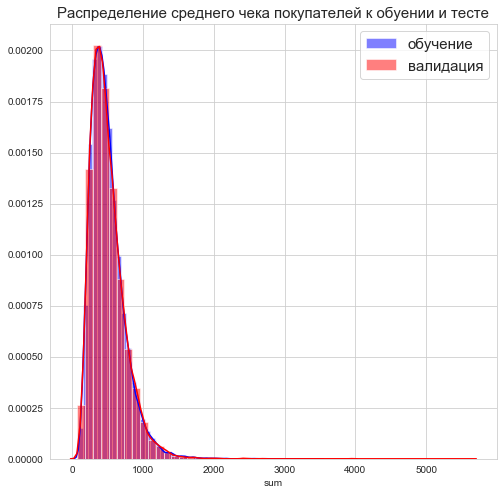

In [8]:
# [1 балл] Проверим, что разделение на обучение и валидацию случайное с точки зрения среднего чека пользователя
# Изобразите плотность распределение среднего чека покупателя для покупателей из обучения и из валидации

# Ваш код здесь:


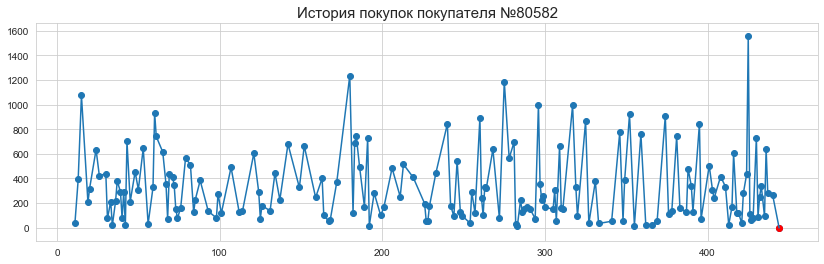

In [9]:
# [1 балл] Изобразите историю сумм покупок для какого-то покупателя
np.random.seed(SEED)
some_user = np.random.choice(all_unq_users)

# Ваш код здесь:


In [10]:
# [2 балла] Реализуйте функцию подсчёта мейпа (MAPE)
# Не забудьте учесть случай нулей в y_true

def mape(y_true: np.array, y_pred: np.array) -> float:
    
    """
    Подсчитывает MAPE по формуле: (1/n) * ∑ |y_true - y_pred| / |y_true|
    
    Args:
        y_true: np.array с истинными значениями таргета
        y_pred: np.array с предсказанными значениями
    Returns:
        MAPE (если в y_true есть нули, то такие наблюдения нужно выкинуть из рассчёта метрики)
    """
    
    # Ваш код здесь:
    
    
    return 

In [11]:
# [2 балла] Сделайте прогноз как среднюю стоимость покупки на истории и посчитайте его точность (MAPE) 
# (на обучении и на валидации)

# Ваш код здесь:


In [15]:
%%time
# [3 балла] Напишите функцию, которая переводит данные о продажах (такие как в data) в формат, удобный для модели, 
# а именно, вот в такой формат:
    #user   day0     day1    day2     day3  ... target    sum1   sum2    sum3  ...
    #0      438      437     435      433         20      555     3       40
    #1      398      438     437      315         93      104     409     143
    #...
# (числа в примере рандомные). day0 - день, на который нужно предсказать
    

def prepare_X(df: pd.DataFrame, ans: pd.DataFrame=None) -> pd.DataFrame:
    
    """
    Преобразует данные об истории продаж в удобный для модели формат. 
    Обязательно наличие у df колонок "user", "day" и "sum"
    
    Args:
        df - датафрейм с историей продаж
        ans - датафрейм с таргетами (обязательны колонки "user" и "sum"). Если ans не None, то в выходном
            датафрейме должен быть столбец target
    """
    
    # Ваш код здесь:
    
    
    return Xy

Xy = prepare_X(df=data, ans=ans)

CPU times: user 36.3 s, sys: 3.45 s, total: 39.8 s
Wall time: 47.9 s


In [26]:
# [1 балл] подберите оптимальное (критерий: MAPE) число соседей на валидации для метода KNN, где в качестве прогноза будем брать
# средние траты по k последним дням, в которых были покупки
n_neighbours = []
mapes_train = []
mapes_test = []

# Ваш код здесь:


n_neighbours = np.array(n_neighbours)
mapes_train = np.array(mapes_train)
mapes_test = np.array(mapes_test)

In [75]:
# [1 балл] Изобразите зависимость mapes_train от n_neighbours и mapes_test от n_neighbours

# Ваш код здесь:

### Весовые схемы

Реализуем различные весовые схемы:

1) $\tilde{w_{i}} = \left( \frac{d - i + 1}{d}  \right)^\delta, \ i \in \{1, 2, \dots, d   \}, \ \delta \in [0, +\infty)$

2) $\tilde{w_{i}} = \lambda^i, \ \lambda \in (0, 1]$

3) $\tilde{w_{i}} = \frac{1}{i^\gamma}, \ \gamma \in [0, +\infty)$

Итоговые веса должны быть нормированы: $\sum\limits_{i=1}^d w_{i} = 1$. Для этого просто поделим веса на сумму: $w_{i} = \frac{\tilde{w_{i}}}{\sum\limits_{i=1}^d\tilde{w_{i}}}$

In [29]:
# [3 балла] Реализуйте функции создание весов по схемам, описанным выше
# На выходе веса должны уже быть нормированными

def delta_weights(d: int, delta: float=1.0) -> np.array:
    # Ваш код здесь:
    return
    

def lamb_weights(d: int, lamb: float=1) -> np.array:
    # Ваш код здесь:
    return 

def gamma_weights(d: int, gamma: float=1) -> np.array:
    # Ваш код здесь:
    return 

In [30]:
# [1 балл] Подберите оптимальное значение параметра delta для первой весовой схемы. В качестве числа соседей 
# возьмите оптимальное число, найденное ранее

delta_list = []
mapes_train = []
mapes_test = []

# Ваш код здесь:

    
delta_list = np.array(delta_list)
mapes_train = np.array(mapes_train);
mapes_test = np.array(mapes_test);

In [79]:
# [1 балл] Изобразите зависимость mapes_train от delta_list и mapes_test от delta_list

# Ваш код здесь:


In [32]:
# [1 балл] Подберите оптимальное значение параметра lamb для второй весовой схемы. В качестве числа соседей 
# возьмите оптимальное число, найденное ранее.

lamba_list = []
mapes_train = []
mapes_test = []

# Ваш код здесь:
    
lamba_list = np.array(lamba_list)
mapes_train = np.array(mapes_train);
mapes_test = np.array(mapes_test);

In [82]:
# [1 балл] Изобразите зависимость mapes_train от lamba_list и mapes_test от lamba_list

# Ваш код здесь:


In [34]:
# [1 балл] Подберите оптимальное значение параметра gamma для третьей весовой схемы. В качестве числа соседей 
# возьмите оптимальное число, найденное ранее.

gamma_list = []
mapes_train = []
mapes_test = []

# Ваш код здесь:

    
gamma_list = np.array(gamma_list)
mapes_train = np.array(mapes_train);
mapes_test = np.array(mapes_test);

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [85]:
# [1 балл] Изобразите зависимость mapes_train от gamma_list и mapes_test от gamma_list

# Ваш код здесь:


### Дополнительные пункты

<ol>
    <li> [3 Балла]
        Попробуйте добавить признаков в модель (День недели, день месяца, номер месяца, расстояние до какой-то даты, ...). Увеличили ли они качество предсказания для Вашей модели?</li>
    <li> [3 Балла] Попробуйте отнестись к признаком дат как к категориальным и сделать для них энкодинги (label encoding, OHE, target encoding, ...). Какая кодировка приводит к наибольшему качеству?</li>
    <li> [4 Балла] В этом пункте у Вас нет ограничения по методикам и моделям - добейтесь максимального качества (минимальный MAPE) на валидации</li>
</ol>

### Получение предсказаний для теста

In [43]:
%%time
# Загружаем данные, для которых хотим получить предсказания
test_data = pd.read_csv('test_data.csv')

CPU times: user 14.5 s, sys: 792 ms, total: 15.3 s
Wall time: 14.8 s


In [48]:
# [1 балл] Получите предсказания для test_data (лучшей из моделей, которые Вы получили ранее) 
# и сохраните их в файл "test_predictions.csv" в той же папке.

# Ваш код здесь:
